# Linear Regression

https://github.com/yunjey/pytorch-tutorial

## Artificial dataset

In [3]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

# hyper parameters
input_size = 1
output_size = 1
num_epochs = 100
learning_rate = 0.001

# toy dataset
# 15 samples, 1 features
x_train = np.array([3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
                    7.042, 10.791, 5.313, 7.997, 3.1], dtype=np.float32)

y_train = np.array([1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
                    2.827, 3.465, 1.65, 2.904, 1.3], dtype=np.float32)

x_train = x_train.reshape(15, 1)
y_train = y_train.reshape(15, 1)

# linear regression model
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        out = self.linear(x)
        return out

model = LinearRegression(input_size, output_size)

# loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# train the model
for epoch in range(num_epochs):
    # convert numpy array to torch Variable
    # ndarray => Tensor => Variable
    inputs = Variable(torch.from_numpy(x_train))
    targets = Variable(torch.from_numpy(y_train))

    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print('Epoch [%d/%d], Loss: %.4f' % (epoch + 1, num_epochs, loss.data[0]))

Epoch [10/100], Loss: 10.0522
Epoch [20/100], Loss: 2.0177
Epoch [30/100], Loss: 0.6979
Epoch [40/100], Loss: 0.4801
Epoch [50/100], Loss: 0.4433
Epoch [60/100], Loss: 0.4361
Epoch [70/100], Loss: 0.4337
Epoch [80/100], Loss: 0.4322
Epoch [90/100], Loss: 0.4309
Epoch [100/100], Loss: 0.4295


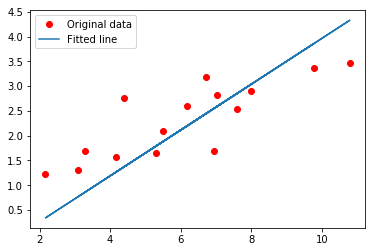

In [4]:
# plot the graph
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

## Boston house price dataset

- https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/
- https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef

In [65]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

epoch 0, loss: 588.6453 val_loss: 602.0461
epoch 200, loss: 454.0449 val_loss: 478.7798
epoch 400, loss: 372.1344 val_loss: 400.3344
epoch 600, loss: 306.7222 val_loss: 335.3589
epoch 800, loss: 251.5997 val_loss: 278.9578
epoch 1000, loss: 204.7989 val_loss: 230.4243
epoch 1200, loss: 165.3578 val_loss: 189.2834
epoch 1400, loss: 132.4891 val_loss: 154.8022
epoch 1600, loss: 105.4577 val_loss: 126.2229
epoch 1800, loss: 83.5674 val_loss: 102.8417
epoch 2000, loss: 66.1559 val_loss: 84.0049
epoch 2200, loss: 52.5934 val_loss: 69.0982
epoch 2400, loss: 42.2834 val_loss: 57.5408
epoch 2600, loss: 34.6645 val_loss: 48.7853
epoch 2800, loss: 29.2164 val_loss: 42.3216
epoch 3000, loss: 25.4660 val_loss: 37.6825
epoch 3200, loss: 22.9946 val_loss: 34.4513
epoch 3400, loss: 21.4458 val_loss: 32.2692
epoch 3600, loss: 20.5289 val_loss: 30.8395
epoch 3800, loss: 20.0201 val_loss: 29.9288
epoch 4000, loss: 19.7576 val_loss: 29.3626
epoch 4200, loss: 19.6328 val_loss: 29.0173
epoch 4400, loss: 19

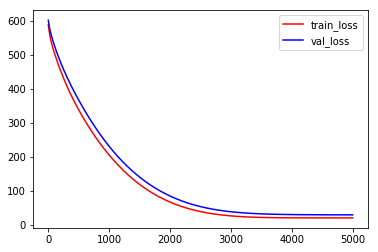

In [103]:
# hyper parameters
input_size = 13
output_size = 1
num_epochs = 5000
learning_rate = 0.01

boston = load_boston()
X = boston.data
y = boston.target
# print(X.shape)
# print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 5)
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

# データの標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# print(np.mean(X_train, axis=0))
# print(np.std(X_train, axis=0))
# print(np.mean(X_test, axis=0))
# print(np.std(X_test, axis=0))

# linear regression model
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        out = self.linear(x)
        return out

model = LinearRegression(input_size, output_size)

# loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

def train(X_train, y_train):
    inputs = Variable(torch.from_numpy(X_train).float())
    targets = Variable(torch.from_numpy(y_train).float())

    optimizer.zero_grad()
    outputs = model(inputs)

    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()

    return loss.data[0]

def valid(X_test, y_test):
    inputs = Variable(torch.from_numpy(X_test).float())
    targets = Variable(torch.from_numpy(y_test).float())
    
    outputs = model(inputs)
    val_loss = criterion(outputs, targets)
    
    return val_loss.data[0]
        
# train the model
loss_list = []
val_loss_list = []
for epoch in range(num_epochs):
    # data shuffle
    perm = np.arange(X_train.shape[0])
    np.random.shuffle(perm)
    X_train = X_train[perm]
    y_train = y_train[perm]

    loss = train(X_train, y_train)
    val_loss = valid(X_test, y_test)

    if epoch % 200 == 0:
        print('epoch %d, loss: %.4f val_loss: %.4f'
              % (epoch, loss, val_loss))

    loss_list.append(loss)
    val_loss_list.append(val_loss)

# plot learning curve
plt.plot(range(num_epochs), loss_list, 'r-', label='train_loss')
plt.plot(range(num_epochs), val_loss_list, 'b-', label='val_loss')
plt.legend()